collect all the mapped reads with samtools
samtools view --threads 8 -f 2 HG00096.chrom20.ILLUMINA.bwa.GBR.low_coverage.20120522.bam > HG00096.chrom20.ILLUMINA.bwa.GBR.low_coverage.20120522.sam

In [ ]:
# collect all the insert sizes from the sam file
input_file = "HG00096.chrom20.ILLUMINA.bwa.GBR.low_coverage.20120522.sam"
output_file = "HG00096.chrom20.ILLUMINA.bwa.GBR.low_coverage.20120522.TLEN"
TLEN = []

with open(input_file, encoding='utf8') as f:
    for line in f:
        line = line.strip()
        items = line.split("\t")
        TLEN.append(items[8])

ff = open(output_file, "w")
for i in range(len(TLEN)):
    ff.write(TLEN[i])
    ff.write("\n")
ff.close()

In [34]:
import matplotlib.pyplot as plt
import math

input_file="HG00096.chrom20.ILLUMINA.bwa.GBR.low_coverage.20120522.TLEN"
insertSize = []

with open(input_file, encoding='utf8') as f:
    for line in f:
        line = int(line.strip())
        if line < 0:
            line = -1 * line
        if line !=0:
            insertSize.append(line)


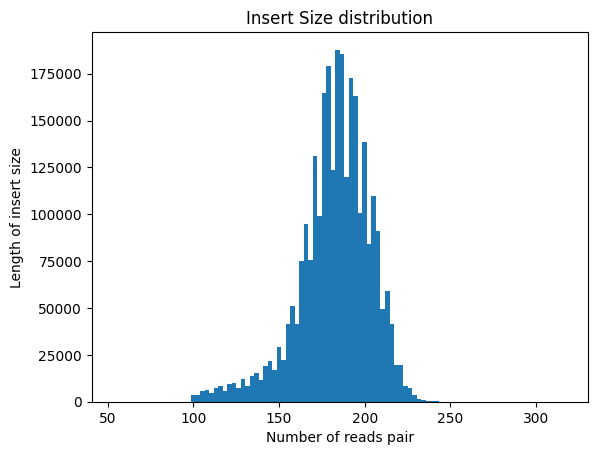

In [35]:
plt.hist(insertSize, 100)
plt.title("Insert Size distribution")
plt.xlabel("Number of reads pair")
plt.ylabel("Length of insert size")
plt.show()

Insert size distribution is an import QC metrics for next generation sequencing.
Insert size are important parameter for variation detection software, such as CNV, SV. 
Insert size distribution can be used to detect structure variation. Clusters of read pairs with significantly different insert sizes is a strong signal of struture variation. 
For cell free DNA (cfDNA), the fragment size of cfDNA from tumor tissue is significantly shorter than which from normal tissue. A lot of studies of cfDNA for different cancers have revealed that insert size has prognostic value.